In [32]:
import pandas as pd

df = pd.read_excel(
    'threecenturies_v2.3.xlsx',  
    sheet_name='A1. Headline series',        
    usecols='B, P, AC',                
    skiprows=7                  
)

df = df.rename(columns={
    'Unnamed: 1': "Real GDP at market prices",
    'Unnamed: 15': "Unemployment rate",
    'Unnamed: 28': "Consumer price inflation"
})

df = df.dropna()  # Drop rows with NaN

print(df)


     Real GDP at market prices  Unemployment rate  Consumer price inflation
194               7.351220e+04           3.790930                  0.488281
195               7.695718e+04           3.572757                 -0.485909
196               7.708776e+04           4.008832                 -3.613281
197               7.741237e+04           5.309585                 -8.409321
198               8.045892e+04           3.325983                 -0.221239
..                         ...                ...                       ...
350               1.684820e+06           8.110983                  4.463693
351               1.706942e+06           7.970745                  2.828242
352               1.739563e+06           7.608094                  2.564799
353               1.792976e+06           6.180032                  1.461031
354               1.833233e+06           5.384406                  0.040099

[161 rows x 3 columns]


In [33]:
df_1 = df[["Real GDP at market prices"]]

df_1["Moving_Avg_2x10"] = df_1["Real GDP at market prices"].rolling(window=20, center=True).mean()

df_1["Real GDP at market prices"] = df_1["Real GDP at market prices"] - df_1["Moving_Avg_2x10"]  
df_1 = df_1.drop(columns = ["Moving_Avg_2x10"])

df_1 = df_1[["Real GDP at market prices"]]


df_2 = df[["Unemployment rate"]]

df_2["Moving_Avg_2x10"] = df_2["Unemployment rate"].rolling(window=20, center=True).mean()

df_2["Unemployment rate"] = df_2["Unemployment rate"] - df_2["Moving_Avg_2x10"]  
df_2 = df_2.drop(columns = ["Moving_Avg_2x10"])

df_2 = df_2[["Unemployment rate"]]


df_3 = df[["Consumer price inflation"]]

df_3["Moving_Avg_3x10"] = df_3["Consumer price inflation"].rolling(window=20, center=True).mean()

df_3["Consumer price inflation"] = df_3["Consumer price inflation"] - df_3["Moving_Avg_3x10"]  
df_3 = df_3.drop(columns = ["Moving_Avg_3x10"])

df_3 = df_3[["Consumer price inflation"]]

df_stationary = pd.concat([df_1, df_2, df_3], axis=1)

df_stationary = df_stationary.dropna()  # Drop rows with NaN

print(df_stationary)


     Real GDP at market prices  Unemployment rate  Consumer price inflation
204                 530.661402          -0.720334                  2.118947
205                -815.771235          -0.362621                  7.530099
206               -3932.042778           1.167761                  5.316075
207               -3033.906116           1.251860                 -3.668062
208               -3219.795418           0.840824                 -6.568567
..                         ...                ...                       ...
341               39577.050000          -1.618365                 -0.978368
342               61489.100000          -1.695424                 -0.804022
343               70473.800000          -1.814916                 -0.825007
344               87015.200000          -1.573617                 -0.085713
345               96780.450000          -0.817460                  0.316873

[142 rows x 3 columns]


C:\Users\guik2\AppData\Local\Temp\ipykernel_28580\3442753048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Moving_Avg_2x10"] = df_1["Real GDP at market prices"].rolling(window=20, center=True).mean()
C:\Users\guik2\AppData\Local\Temp\ipykernel_28580\3442753048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Real GDP at market prices"] = df_1["Real GDP at market prices"] - df_1["Moving_Avg_2x10"]
C:\Users\guik2\AppData\Local\Temp\ipykernel_28580\3442753048.py:13: SettingWithCopyWarning:

Question 29: Using the original dataset, test the unit root hypothesis for all variables.

In [34]:
from statsmodels.tsa.stattools import adfuller

df = df.dropna()  # Drop rows with NaN
df = df[~df.isin([float('inf'), float('-inf')]).any(axis=1)]  # Remove rows with inf

variables = ['Real GDP at market prices', 'Unemployment rate', 'Consumer price inflation']   

for var in variables:
    result = adfuller(df[var])
    print (var)
    print(f'ADF Statistic for {var}: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("Reject the unit root hypothesis, so the series is stationary")
    else:
        print("We accept the unit root hypothesis, so the series is not stationary")
    print('---------------------------')

Real GDP at market prices
ADF Statistic for Real GDP at market prices: 4.75635282976845
p-value: 1.0
We accept the unit root hypothesis, so the series is not stationary
---------------------------
Unemployment rate
ADF Statistic for Unemployment rate: -3.3174175336487006
p-value: 0.014117636865537565
Reject the unit root hypothesis, so the series is stationary
---------------------------
Consumer price inflation
ADF Statistic for Consumer price inflation: -5.2976981207997484
p-value: 5.536091623454105e-06
Reject the unit root hypothesis, so the series is stationary
---------------------------


Question 30: Transform all variables so that they are stationary using either your answers to questions 28 or to question 29.

In [35]:
from statsmodels.tsa.stattools import adfuller

df_stationary = df_stationary.dropna()  # Drop rows with NaN
df_stationary = df_stationary[~df_stationary.isin([float('inf'), float('-inf')]).any(axis=1)]  # Remove rows with inf

variables = ['Real GDP at market prices', 'Unemployment rate', 'Consumer price inflation']   

for var in variables:
    result = adfuller(df_stationary[var])
    print (var)
    print(f'ADF Statistic for {var}: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("Reject the unit root hypothesis, so the series is stationary")
    else:
        print("We accept the unit root hypothesis, so the series is not stationary")
    print('---------------------------')

Real GDP at market prices
ADF Statistic for Real GDP at market prices: -5.216338699995358
p-value: 8.141323486394978e-06
Reject the unit root hypothesis, so the series is stationary
---------------------------
Unemployment rate
ADF Statistic for Unemployment rate: -5.7631870697010985
p-value: 5.610315160451365e-07
Reject the unit root hypothesis, so the series is stationary
---------------------------
Consumer price inflation
ADF Statistic for Consumer price inflation: -6.0273633550359325
p-value: 1.445194889677531e-07
Reject the unit root hypothesis, so the series is stationary
---------------------------


Question 31: Explain the difference between ACF and PACF.

The ACF measures the correlation between a time series and its past values at various time lags, capturing both direct and indirect influences from earlier observations. In contrast, the PACF isolates the direct correlation between a time series observation and its past values by removing the effects of intermediate lags, highlighting the unique contribution of each lag.










Question 32: Plot and comment on the ACF and PACF of all variables.

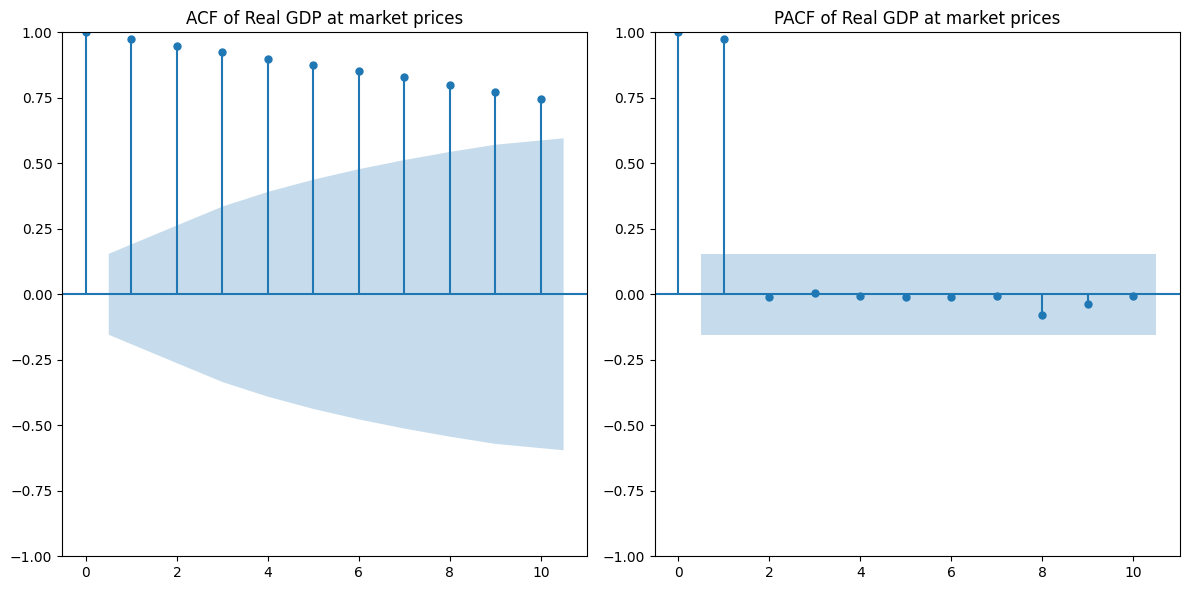

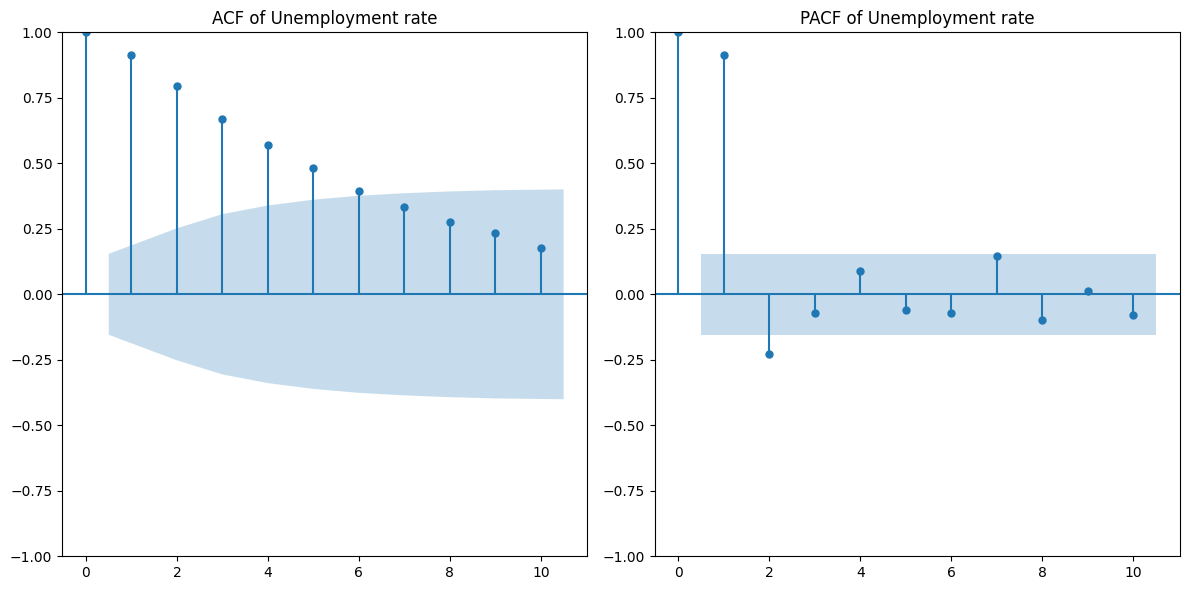

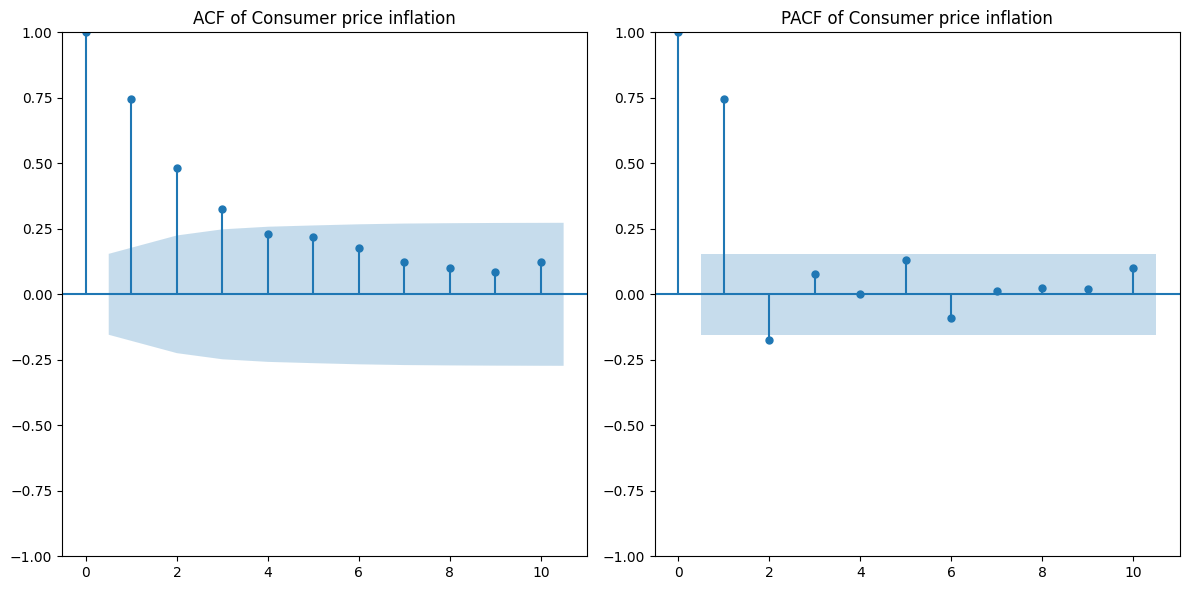

In [36]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for column in df.columns:
    plt.figure(figsize=(12, 6))
    
    # ACF plot
    plt.subplot(1, 2, 1)
    plot_acf(df[column], lags=10, ax=plt.gca())  # Adjust lags as needed
    plt.title(f"ACF of {column}")
    
    # PACF plot
    plt.subplot(1, 2, 2)
    plot_pacf(df[column], lags=10, ax=plt.gca())  # Adjust lags as needed
    plt.title(f"PACF of {column}")
    
    plt.tight_layout()
    plt.show()

Comment on the plots:
- For the real GDP at market prices: the ACF shows a very high autocorrelation with recent previous values and slowly decreasing towards the past. This slow decrease shows that there is a persistent trend on the values, which indicates this might be a non-stationary time series: this is very interesting since we saw from the unit root hypothesis on the original dataset that this variable was non-stationary. About the PACF: we know it is measuring the direct autocorrelation between the lagged metric and the one at stake. We see from the plot that the two most recent metrics play an important role, but for any datapoint older than that we see that the impact is minimal, if any.

- For the unemployment rate:

- For the consumer price inflation:


Question 33: Explain the principle of parsimony and its relationship with Ockham’s razor using the theory of information criterion.